# Tutorial

This tutorial is a Jupyter notebook that illustrates steps involved in using Tapqir. If you would like to experiment with the live version of the notebook download it or run it in Google Colab using the links above.

In [1]:
# If you are running tutorial in Google Colab do this steps first
# 1) Change runtime to GPU (Runtime -> Change runtime type -> GPU)
# 2) Run this cell to install Tapqir in Google Colab
import sys
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !pip install --quiet git+https://github.com/gelles-brandeis/tapqir.git > install.log

## Initialize Tapqir folder

In [2]:
%mkdir Rpb1SNAP549
%cd Rpb1SNAP549
!tapqir init

/home/ordabayev/repos/tapqir/docs/source/user_guide/Rpb1SNAP549
Initialized Tapqir analysis folder.

Tapqir is a Bayesian program for single-molecule data analysis.
---------------------------------------------------------------
- Checkout the documentation: <https://tapqir.readthedocs.io/>
- Get help on our forum: <https://github.com/gelles-brandeis/tapqir/discussions>
- Star us on GitHub: <https://github.com/gelles-brandeis/tapqir>



## Import & preprocess data

In this tutorial we will analyze the data from Rpb1-SNAP$^{549}$ binding to DNA$^{488}$ experiment ([Dynamics of RNA polymerase II and elongation factor Spt4/5 recruitment during activator-dependent transcription](https://www.pnas.org/content/117/51/32348))

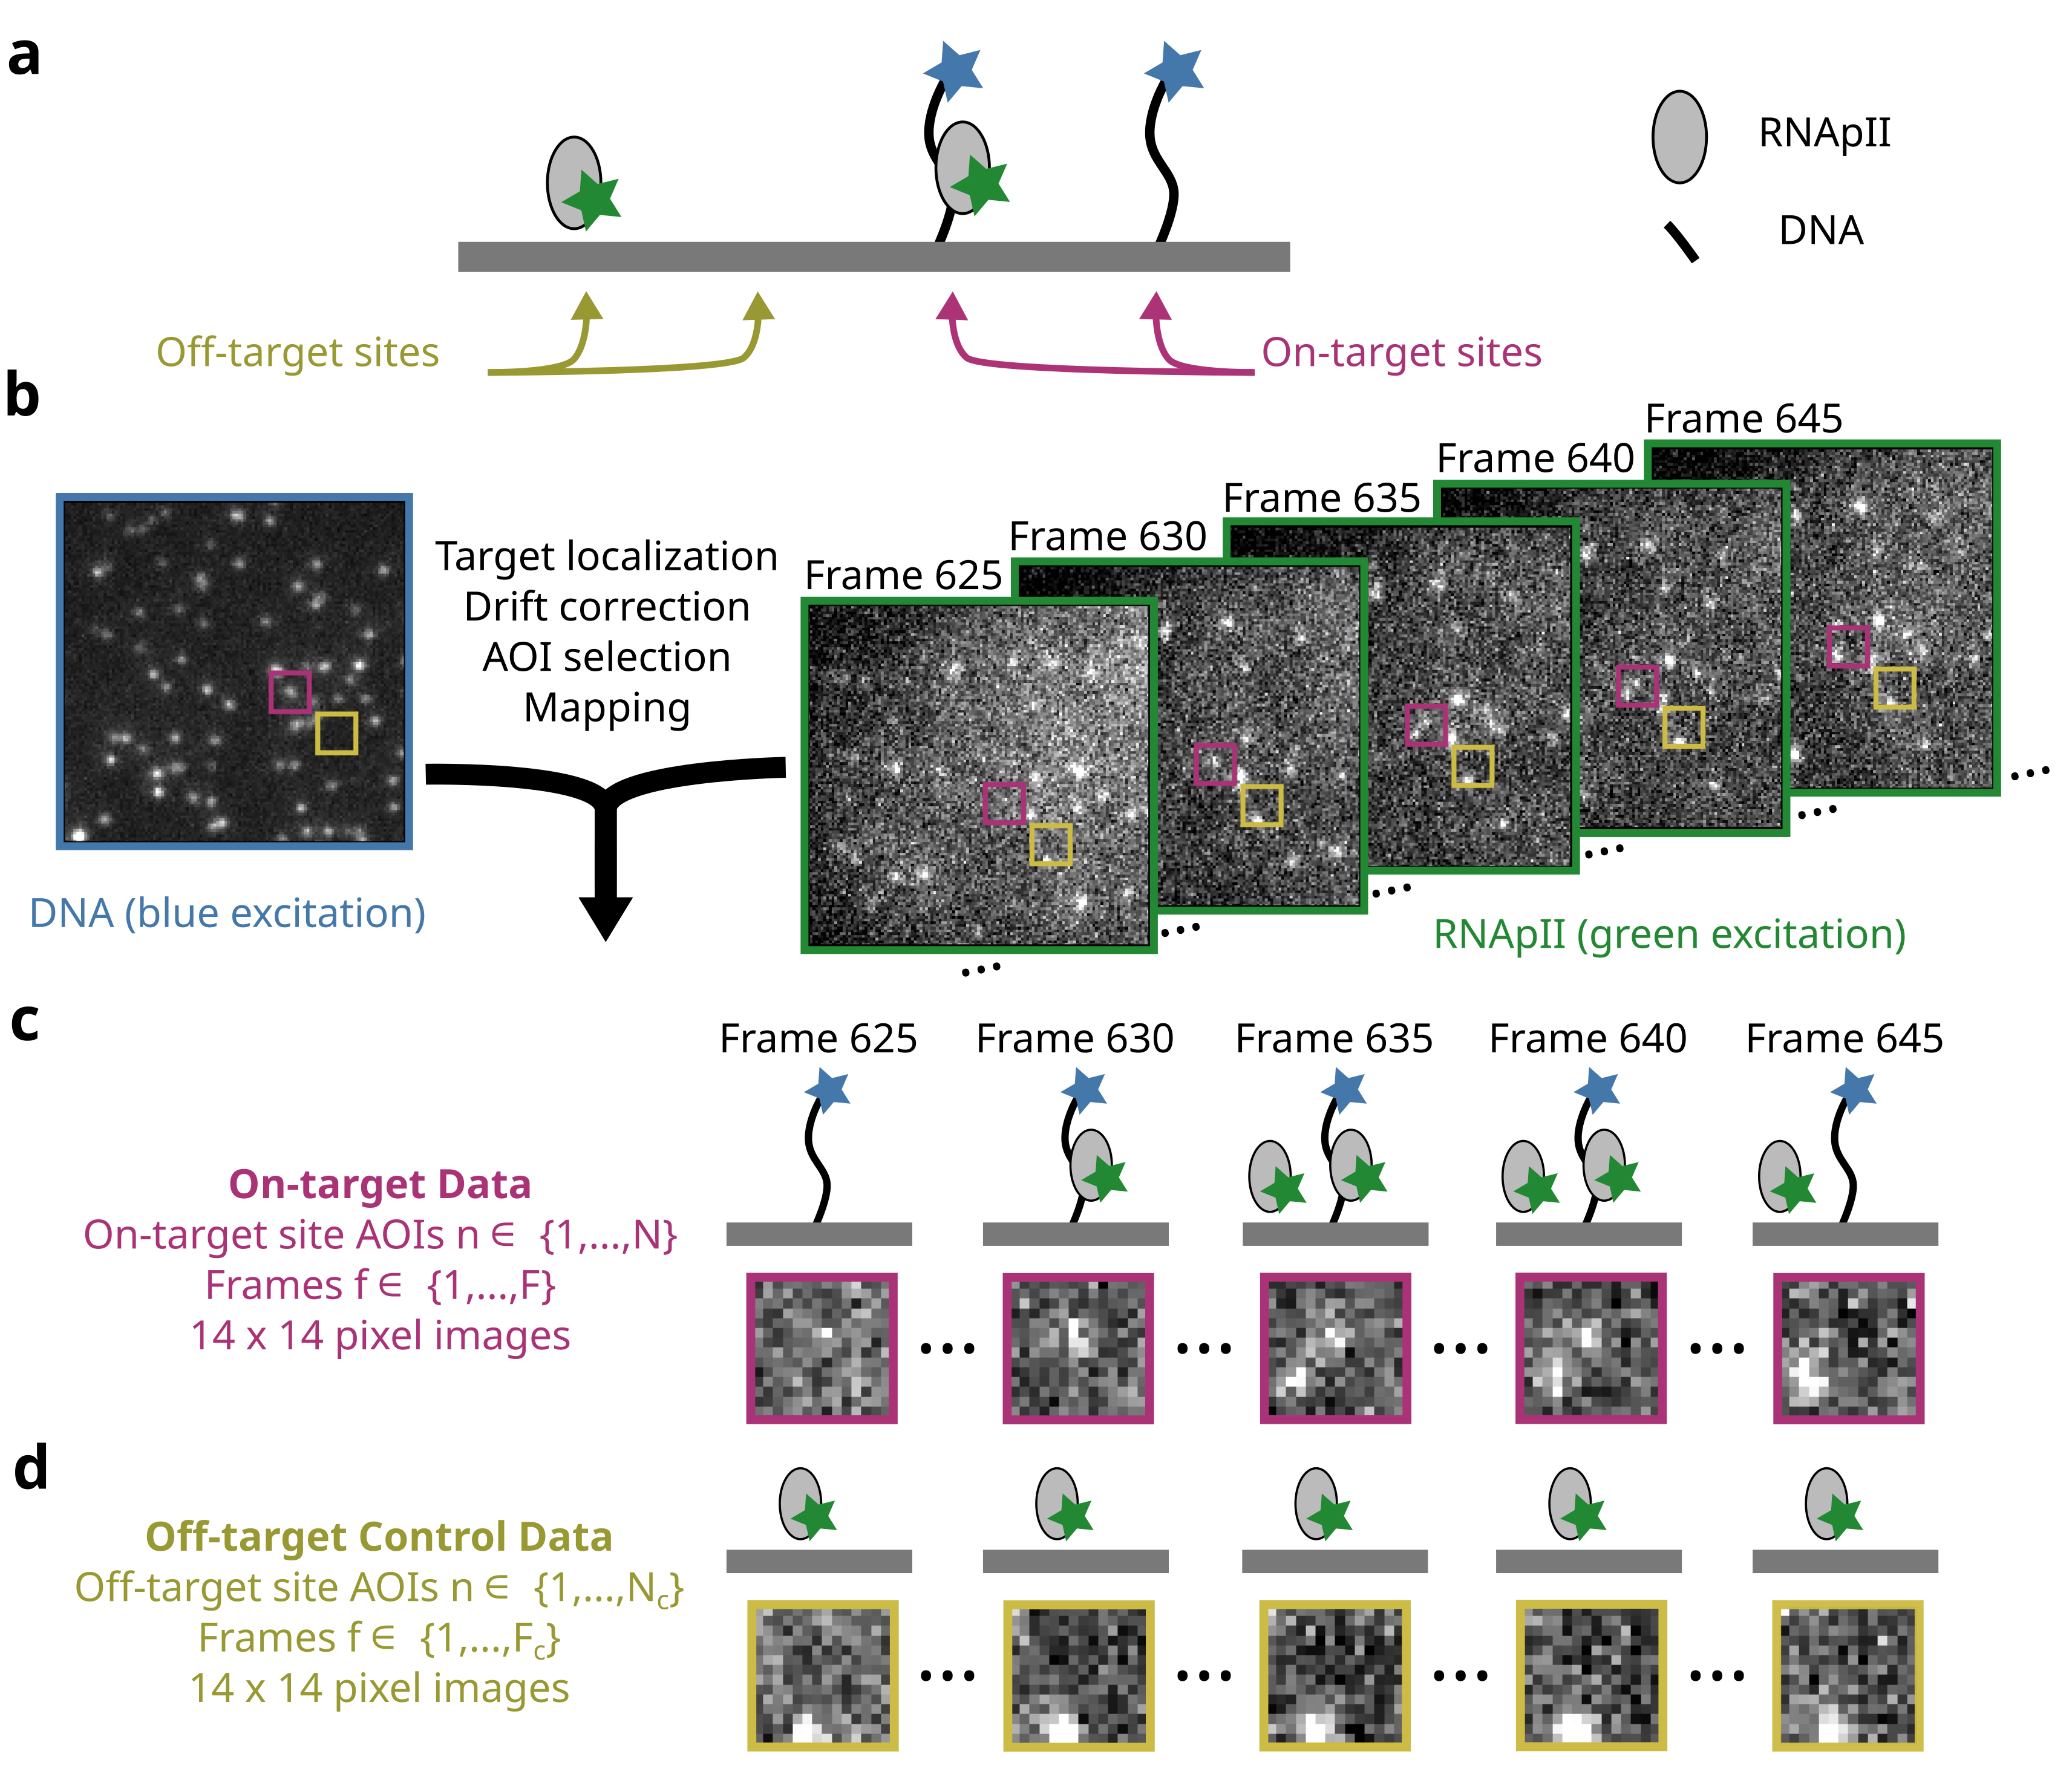

In [3]:
from IPython.display import Image
Image("http://centaur.biochem.brandeis.edu/figure1.png", width=600)

This data was acquired with [Glimpse](https://github.com/gelles-brandeis/Glimpse) and pre-processed with imscroll program (see [CoSMoS_Analysis](https://github.com/gelles-brandeis/CoSMoS_Analysis/wiki)). To prepare data for Tapqir, we need to specify the location of following files & folders:

* `title` - Text describing the experiment
* `header_dir` - folder name containing glimpse and header files
* `ontarget_aoiinfo` - file designating target molecule (DNA) locations in the binder channel
* `offtarget_aoiinfo` - file designating off-target (nonDNA) locations in the binder channel
* `driftlist` - file recording the stage movement that took place during the experiment
* `frame_start` - starting frame (optional)
* `frame_end` - ending frame (optional)
* `ontarget_labels` - predicted labels with another program (e.g., spot-picker) (optional for comparison)
* `offtarget_labels` - predicted labels with another program (e.g., spot-picker) (optional for comparison)

In [4]:
%%capture
# Download glimpse files for the tutorial (only once)
!wget http://centaur.biochem.brandeis.edu/Rpb1SNAP549_glimpse.zip
!unzip Rpb1SNAP549_glimpse.zip && rm Rpb1SNAP549_glimpse.zip

Let's check the content of our folder:

In [5]:
%ls -alh

total 16K
drwxr-xr-x 4 ordabayev ordabayev 4.0K Sep 16 16:44 ./
drwxr-xr-x 4 ordabayev ordabayev 4.0K Sep 16 16:44 ../
drwxr-xr-x 3 ordabayev ordabayev 4.0K Aug 20 15:39 Rpb1SNAP549_glimpse/
drwxr-xr-x 2 ordabayev ordabayev 4.0K Sep 16 16:44 .tapqir/


In [6]:
!tapqir glimpse --title Rpb1SNAP549 --header-dir Rpb1SNAP549_glimpse/garosen00267/ \
    --ontarget-aoiinfo Rpb1SNAP549_glimpse/green_DNA_locations.dat \
    --offtarget-aoiinfo Rpb1SNAP549_glimpse/green_nonDNA_locations.dat \
    --driftlist Rpb1SNAP549_glimpse/green_driftlist.dat \
    --frame-start 1 --frame-start 790

INFO - Processing glimpse files ...
100%|████████████████████████████████████████| 862/862 [00:07<00:00, 118.42it/s]
INFO - On-target data: N=331 AOIs, F=862 frames, P=14 pixels, P=14 pixels
INFO - Off-target data: N=526 AOIs, F=862 frames, P=14 pixels, P=14 pixels
INFO - Data is saved in /home/ordabayev/repos/tapqir/docs/source/user_guide/Rpb1SNAP549/data.tpqr


In [7]:
%ls -alh

total 1.1G
drwxr-xr-x 4 ordabayev ordabayev 4.0K Sep 16 16:44 ./
drwxr-xr-x 4 ordabayev ordabayev 4.0K Sep 16 16:44 ../
-rw-r--r-- 1 ordabayev ordabayev 1.1G Sep 16 16:44 data.tpqr
drwxr-xr-x 3 ordabayev ordabayev 4.0K Aug 20 15:39 Rpb1SNAP549_glimpse/
drwxr-xr-x 2 ordabayev ordabayev 4.0K Sep 16 16:44 .tapqir/


## Data analysis

We will analyze the data using the time-independent model.

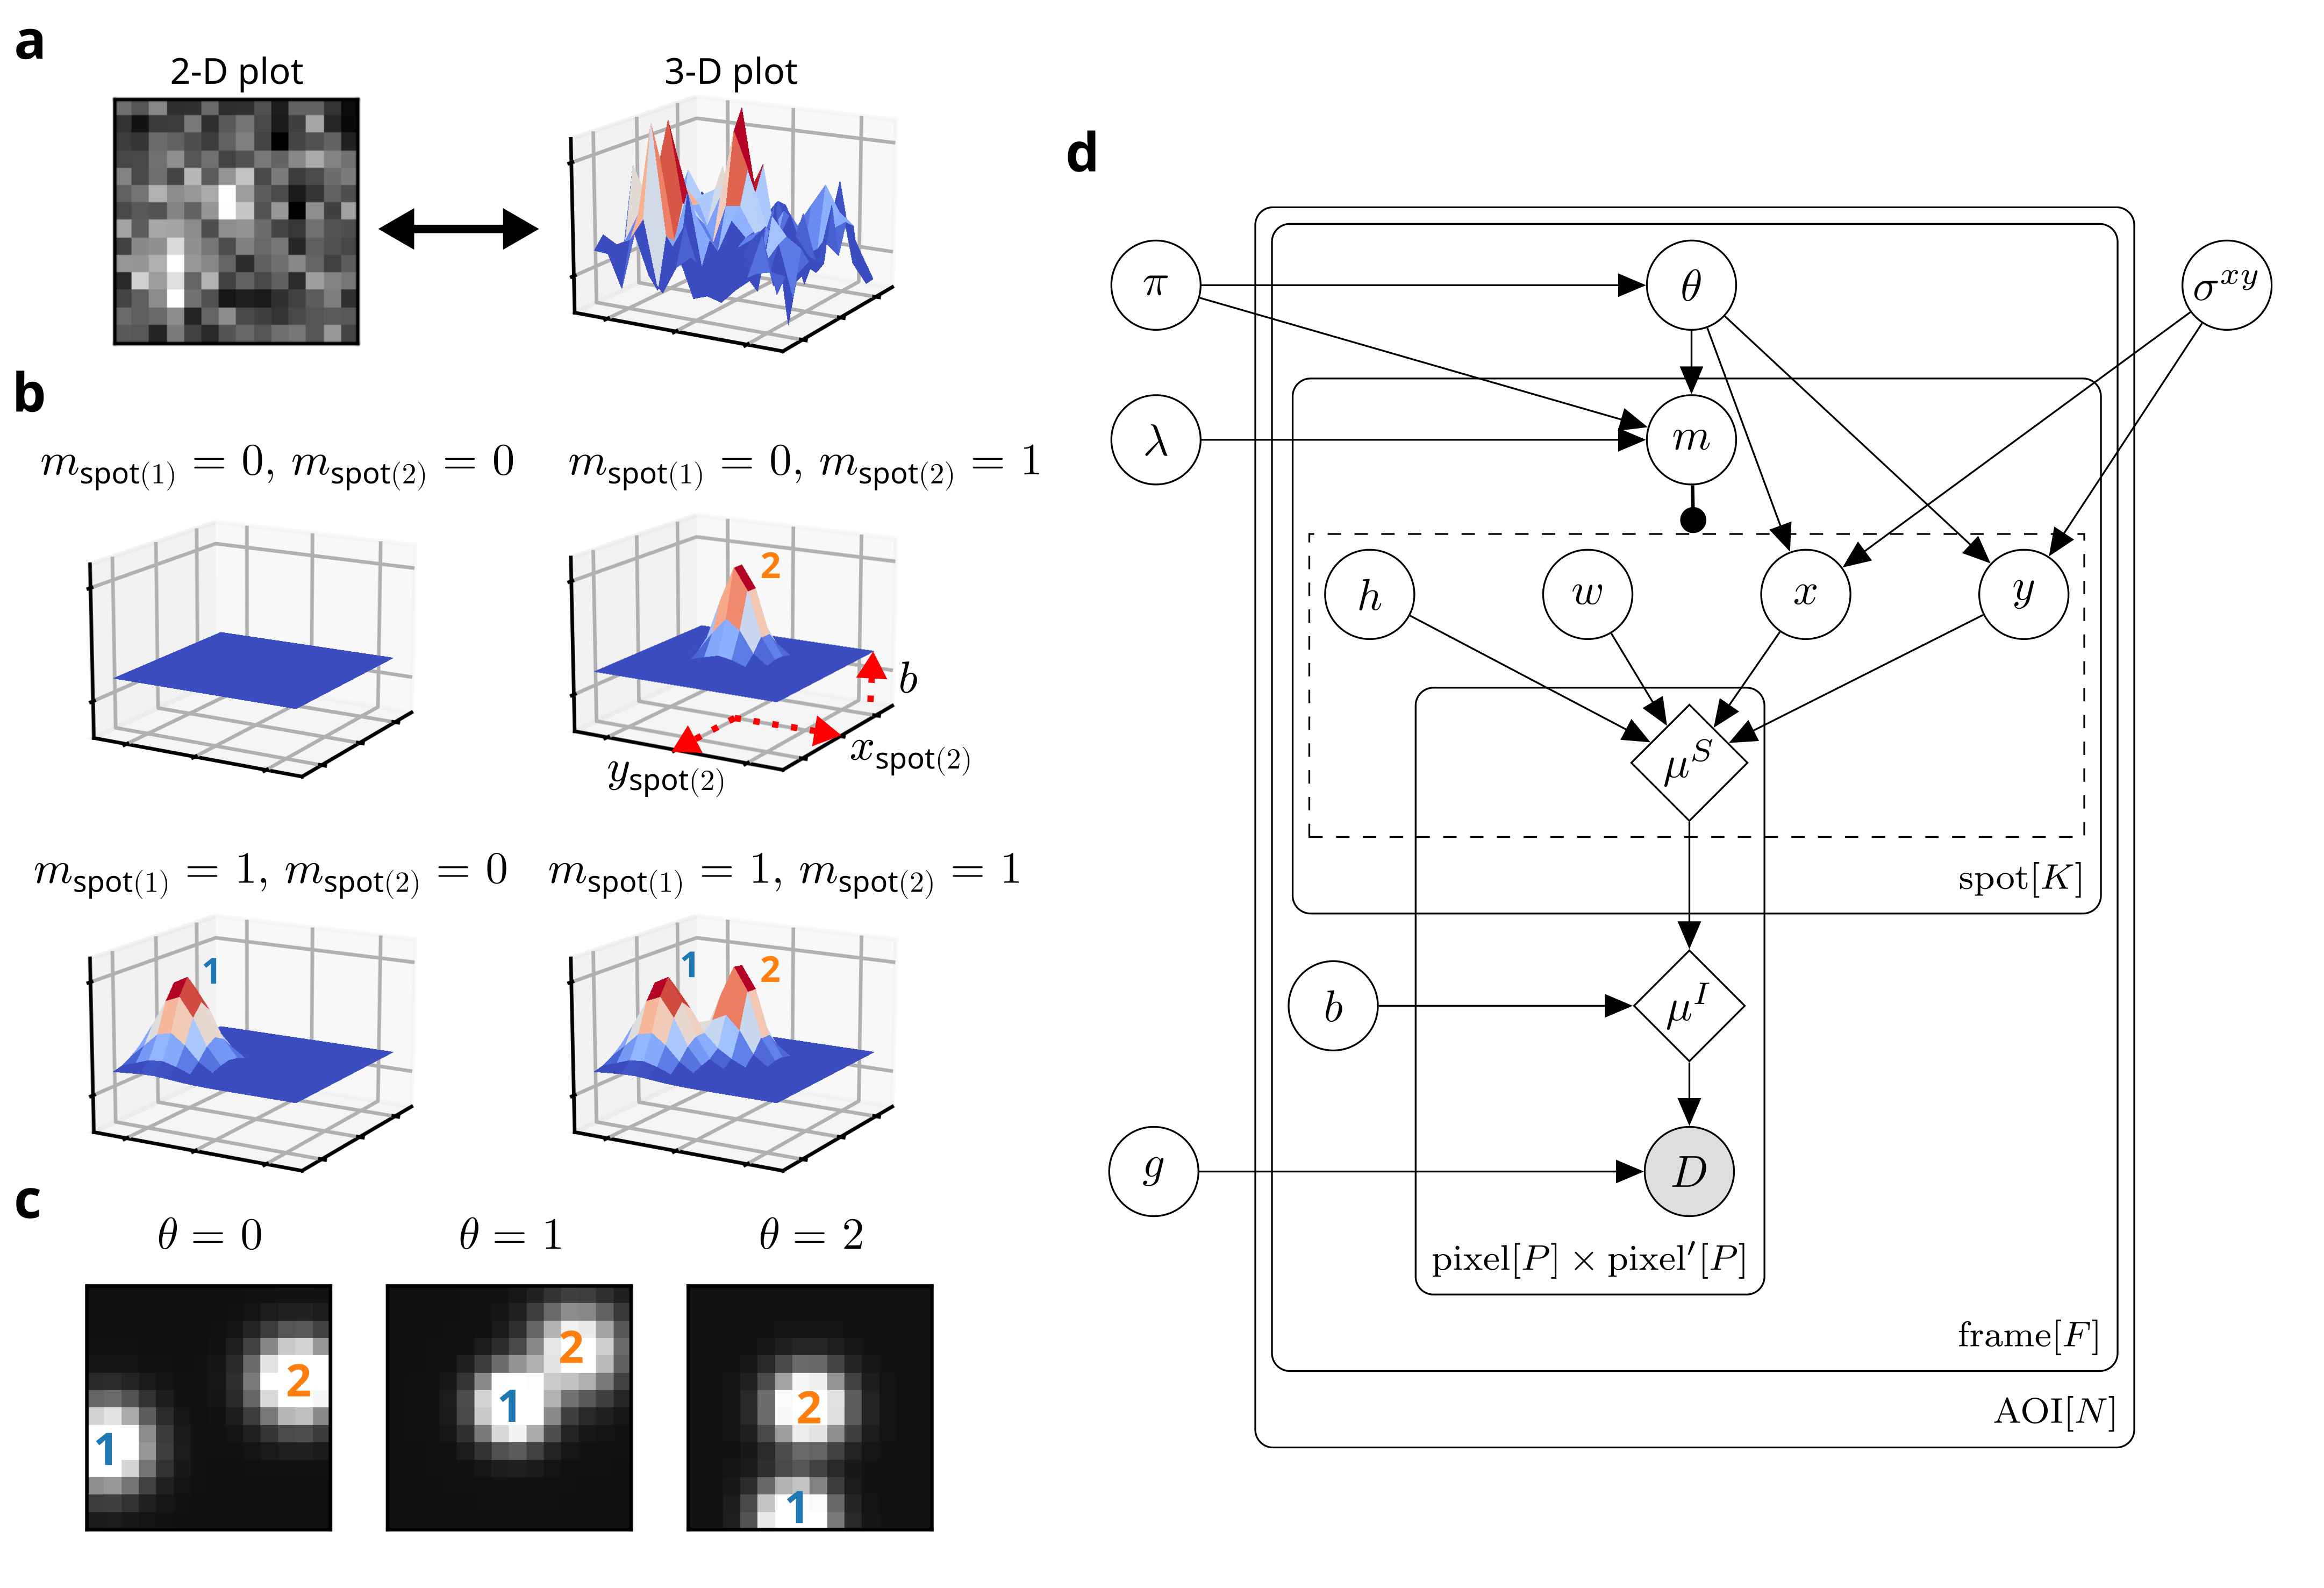

In [8]:
from IPython.display import Image
Image("http://centaur.biochem.brandeis.edu/figure2.png", width=800)

Global parameters:
* $\pi$ - average target-specific spot probability
* $\lambda$ - non-specific binding rate
* $g$ - camera gain
* $\sigma^{xy}$ - proximity parameter

Local parameters
* $b$ - background intensity
* $\theta$ - index of target-specific spot (0 means target-specific spot is absent)
* $m$ - spot presence indicator
* $h$ - spot intensity
* $w$ - spot width
* $x, y$ - position of the center of the spot
* $\mu^S$ - 2-D Gaussian spot shape
* $\mu^I$ - ideal image shape (without offset)

Observed data
* $D$ - observed images

Probability of there being any target-specific spot in a frame $p(\mathsf{specific})$ is calculated as $p(\theta>0)$.

In [9]:
!tapqir fit marginal --cuda -bs 16 -it 100

INFO - Tapqir version - v1.1.6+523.gd6819ce.dirty
INFO - Model - marginal
INFO - Device - cuda
INFO - Floating precision - torch.float64
INFO - Loaded data from /home/ordabayev/repos/tapqir/docs/source/user_guide/Rpb1SNAP549/data.tpqr
INFO - Optimizer - Adam
INFO - Learning rate - 0.005
INFO - Batch size - 16
100%|█████████████████████████████████████████| 100/100 [00:31<00:00,  3.18it/s]


In [10]:
!tapqir fit cosmos --cuda -bs 16 -it 100

INFO - Tapqir version - v1.1.6+523.gd6819ce.dirty
INFO - Model - cosmos
INFO - Device - cuda
INFO - Floating precision - torch.float64
INFO - Loaded data from /home/ordabayev/repos/tapqir/docs/source/user_guide/Rpb1SNAP549/data.tpqr
WARNING - Model at /home/ordabayev/repos/tapqir/docs/source/user_guide/Rpb1SNAP549/.tapqir/marginal/v1.1.6 has not been fully trained
INFO - Optimizer - Adam
INFO - Learning rate - 0.005
INFO - Batch size - 16
100%|█████████████████████████████████████████| 100/100 [00:30<00:00,  3.32it/s]


### Tensorboard

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir=.

### Posterior distributions

In [13]:
!tapqir stats cosmos --matlab

INFO - Tapqir version - v1.1.6+523.gd6819ce.dirty
INFO - Model - cosmos
INFO - Device - cpu
INFO - Floating precision - torch.float64
INFO - Loaded data from /home/ordabayev/repos/tapqir/docs/source/user_guide/Rpb1SNAP549/data.tpqr
INFO - Device - cpu
INFO - Floating precision - torch.float64
